# Dry Bean

The source can be found [here](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset).

## Data Set Information:

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.


Attribute Information:

01. Area (A): The area of a bean zone and the number of pixels within its boundaries.
02. Perimeter (P): Bean circumference is defined as the length of its border.
03. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
04. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
05. Aspect ratio (K): Defines the relationship between L and l.
06. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
07. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
08. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
09. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

## Imports

In [1]:
import re  # Regex

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Global parameters setup

Executing methods that do some data transformation which involves randomness (i.e. sampling or data splitting) yields different result for each run. In order to have predictable results we can leverage the function argument called `random_state` and set it to a constant value (`randomness_id`).

In [2]:
# @formatter:off
%matplotlib inline
# @formatter:on
randomness_id = 5100
np.random.seed(randomness_id)

## Dataset loading

In [3]:
df = pd.read_excel("./data/Dry_Bean_Dataset.xlsx")
df.shape

(13611, 17)

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


 Transform all column names to the snake case style of writing.

In [5]:
df.columns = map(lambda name: re.sub("(?!^)([A-Z0-9]+)", r"_\1", name).lower(), df.columns)

## Data purity and missing data

Checking out the non-null count consistency between columns and their Dtype, which could indicate the mixed types or existence of the nullish values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               13611 non-null  int64  
 1   perimeter          13611 non-null  float64
 2   major_axis_length  13611 non-null  float64
 3   minor_axis_length  13611 non-null  float64
 4   aspect_ration      13611 non-null  float64
 5   eccentricity       13611 non-null  float64
 6   convex_area        13611 non-null  int64  
 7   equiv_diameter     13611 non-null  float64
 8   extent             13611 non-null  float64
 9   solidity           13611 non-null  float64
 10  roundness          13611 non-null  float64
 11  compactness        13611 non-null  float64
 12  shape_factor_1     13611 non-null  float64
 13  shape_factor_2     13611 non-null  float64
 14  shape_factor_3     13611 non-null  float64
 15  shape_factor_4     13611 non-null  float64
 16  class              136

Check for the existence of the nullish values.


In [7]:
df.isnull().sum()

area                 0
perimeter            0
major_axis_length    0
minor_axis_length    0
aspect_ration        0
eccentricity         0
convex_area          0
equiv_diameter       0
extent               0
solidity             0
roundness            0
compactness          0
shape_factor_1       0
shape_factor_2       0
shape_factor_3       0
shape_factor_4       0
class                0
dtype: int64

## Sample the data

Take a distributed sample of the date in order to speed up training and experimentation.

In [8]:
df = df.sample(frac=1, random_state=randomness_id)

## Data correlation

<AxesSubplot:>

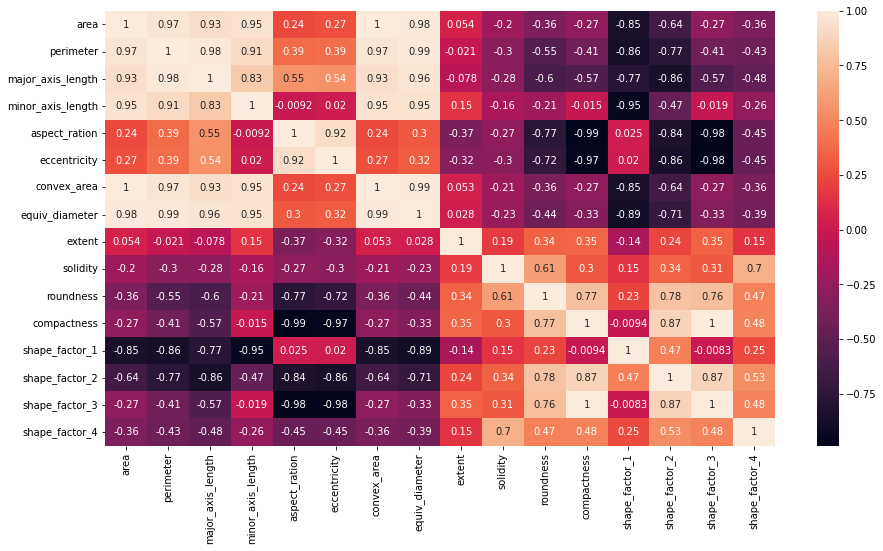

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)

## Data balance

In [10]:
df["class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: class, dtype: int64

## Outliers detection

In [11]:
df.describe()

,area,perimeter,major_axis_length,minor_axis_length,aspect_ration,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor_1,shape_factor_2,shape_factor_3,shape_factor_4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Models

### Function definitions

In [12]:
def train_and_evaluate_single(X, y, pipeline, cv_split):
    (name, pipeline_instance) = pipeline
    # More on _scoring_ can be read here: https://scikit-learn.org/stable/modules/cross_validation.html#the-cross-validate-function-and-multiple-metric-evaluation
    results = cross_validate(pipeline_instance, X, y, cv=cv_split, n_jobs=-1, return_estimator=True)
    test_scores = results["test_score"]
    mean_score = test_scores.mean()
    max_score = test_scores.max()
    best_estimator = results["estimator"][test_scores.tolist().index(max_score)]
    return name, (mean_score, max_score), best_estimator


def extract_best_model(results):
    best = None
    for res in results:
        res_mean_accuracy = res[1][0]
        best = res if (best is None) or (res_mean_accuracy > best[1][0]) else best
    return best


def train_evaluate_present(X, y, pipelines, cv_split,
                           should_present=True,
                           should_plot=True,
                           should_return_best=False,
                           comparison=None):
    results = []
    for pipeline in pipelines:
        result = train_and_evaluate_single(X, y, pipeline, cv_split)
        results.append(result)
    best = extract_best_model(results)
    if should_present:
        mean_text = "Mean accuracy of: {:0.5f}".format(best[1][0])
        if comparison is not None:
            mean_text += (" ({:0.5f})".format(best[1][0] - comparison[1][0]))
        max_text = "Max accuracy of: {:0.5f}".format(best[1][1])
        if comparison is not None:
            max_text += (" ({:0.5f})".format(best[1][1] - comparison[1][1]))
        print(
            "The best results were given by \"{}\" classifier with:\n  {}\n  {}".format(
                best[0],
                mean_text,
                max_text))
        if should_plot:
            print(("-" * 15) + "\nFollowing are results for all classifiers:\n")
            for result in results:
                name, (mean_accuracy, max_accuracy), estimator = result
                _, ax = plt.subplots(figsize=(8, 8))
                ax.set_title(
                    "{}\nMean accuracy: {:0.5f}\nMax accuracy: {:0.5f}".format(name, mean_accuracy, max_accuracy)
                )
                ConfusionMatrixDisplay.from_estimator(estimator, X, y, ax=ax)
    if should_return_best:
        return best

#### Common parameters

In [13]:
cv_split = StratifiedKFold(n_splits=10, shuffle=True, random_state=randomness_id)
scaler = RobustScaler()

### General classifier comparison (no optimizations)

The best results were given by "SVC" classifier with:
  Mean accuracy of: 0.92903
  Max accuracy of: 0.93608
---------------
Following are results for all classifiers:



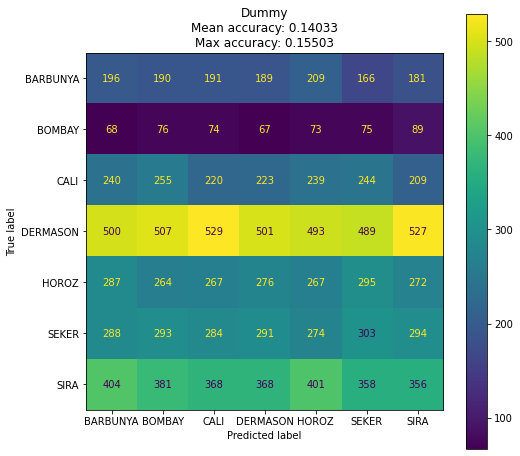

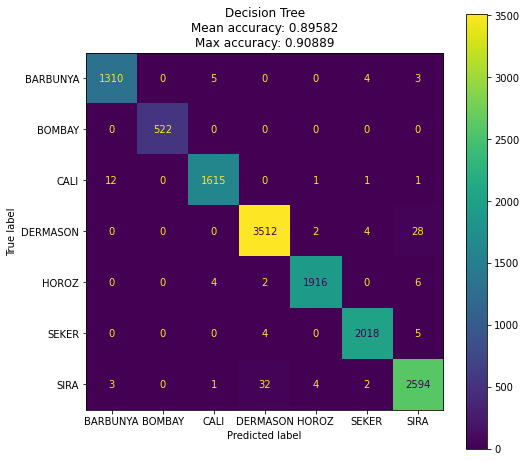

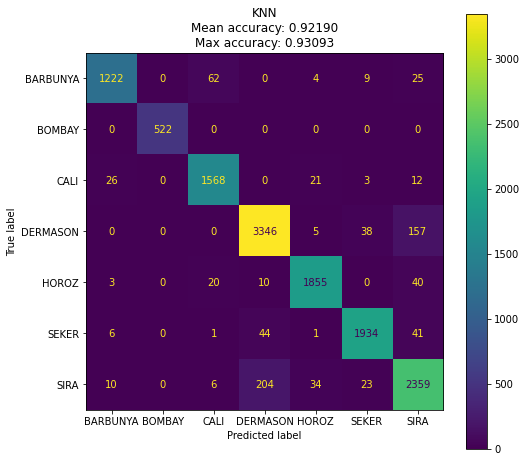

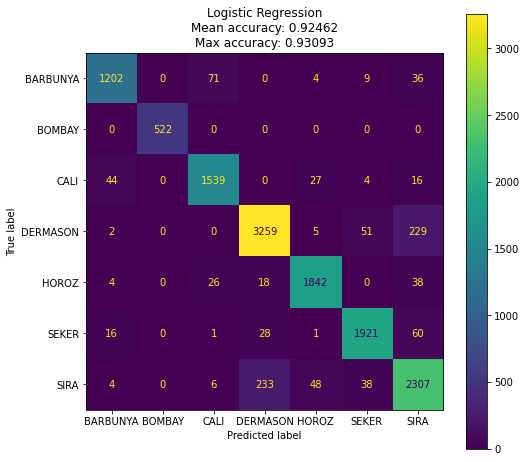

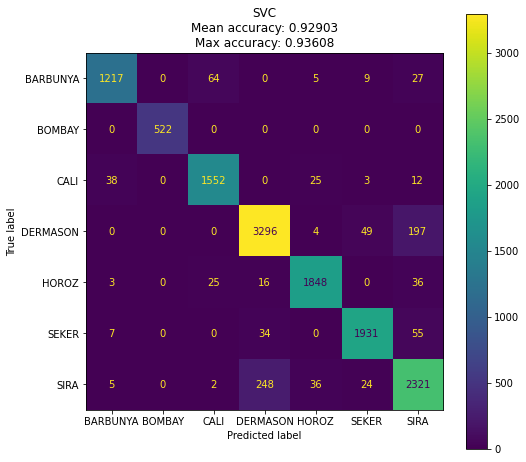

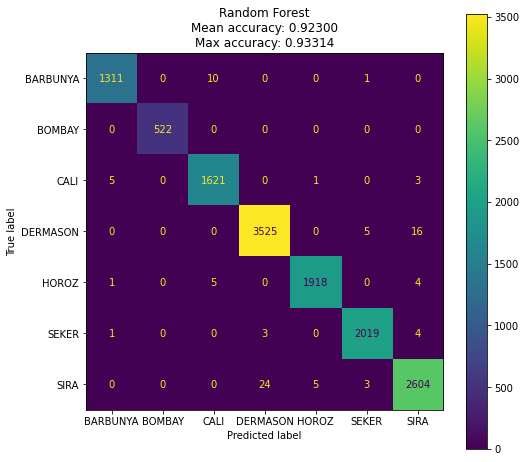

In [14]:
# List of the pipelines for which will model be trained and evaluated.
pipelines = [
    ("Dummy",
     make_pipeline(scaler, DummyClassifier(strategy="uniform", random_state=randomness_id))),
    ("Decision Tree",
     make_pipeline(scaler, DecisionTreeClassifier(random_state=randomness_id))),
    ("KNN",
     make_pipeline(scaler, KNeighborsClassifier())),
    ("Logistic Regression",
     make_pipeline(scaler, LogisticRegression(solver='lbfgs', max_iter=400, random_state=randomness_id))),
    ("SVC",
     make_pipeline(scaler, SVC(random_state=randomness_id))),
    ("Random Forest",
     make_pipeline(scaler, RandomForestClassifier(random_state=randomness_id)))
]

X = df.drop("class", axis=1).copy()
y = df["class"].copy()

no_optimisations_best = train_evaluate_present(X, y,
                                               pipelines=pipelines,
                                               cv_split=cv_split,
                                               should_return_best=True
                                               )

## Naive outliers removal attempt

In [15]:
area_std = df["area"].std()
no_outliers_df = df[(df["area"].abs() < (3 * area_std))]
no_outliers_df.describe()

,area,perimeter,major_axis_length,minor_axis_length,aspect_ration,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor_1,shape_factor_2,shape_factor_3,shape_factor_4
count,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000,12876.000000
mean,47493.707285,820.075367,306.899220,194.231583,1.581235,0.749225,48135.706741,242.788061,0.748545,0.987198,0.874406,0.800724,0.006719,0.001763,0.645108,0.995252
std,15500.027201,152.323370,64.474156,27.925592,0.251532,0.093765,15802.792559,39.050504,0.049230,0.004601,0.060378,0.062851,0.000935,0.000577,0.100807,0.004279
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.004241,0.000751,0.410339,0.947687
25%,35866.250000,698.967500,251.430115,174.629449,1.425808,0.712810,36262.750000,213.696813,0.717329,0.985777,0.831119,0.762772,0.006114,0.001224,0.581821,0.994027
50%,43634.000000,783.463000,291.306257,190.946598,1.546572,0.762837,44131.500000,235.704337,0.758568,0.988313,0.886059,0.802670,0.006697,0.001745,0.644279,0.996532
75%,57029.250000,943.759000,366.476990,209.098695,1.706619,0.810344,57913.750000,269.465946,0.785970,0.990006,0.918652,0.835977,0.007323,0.002202,0.698858,0.997949
max,87968.000000,1273.205000,473.950668,301.705356,2.430306,0.911423,90297.000000,334.670489,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


We can see above that outliers are gone, but below we can see that one **whole** label was removed. It just happens to be the same label with the least entries.

In [16]:
no_outliers_df["class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1476
BARBUNYA    1263
Name: class, dtype: int64

### Data Balancing attempt

In [17]:
df["class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: class, dtype: int64

(13611, 17) (2926, 17) (10662, 17)
BARBUNYA    418
BOMBAY      418
CALI        418
DERMASON    418
HOROZ       418
SEKER       418
SIRA        418
Name: class, dtype: int64
The best results were given by "SVC" classifier with:
  Mean accuracy of: 0.93678
  Max accuracy of: 0.94881
---------------
Following are results for all classifiers:



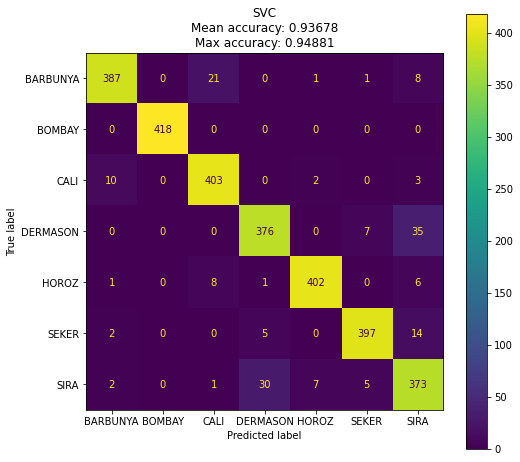

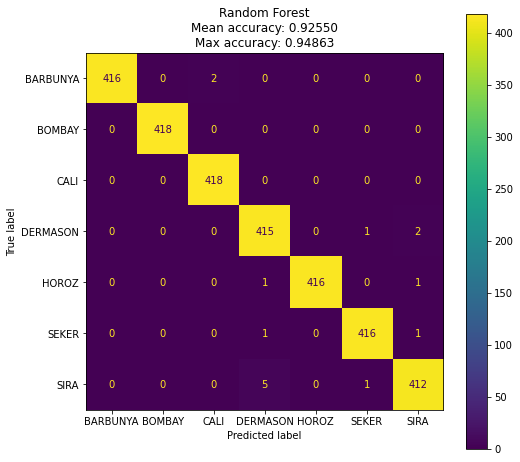

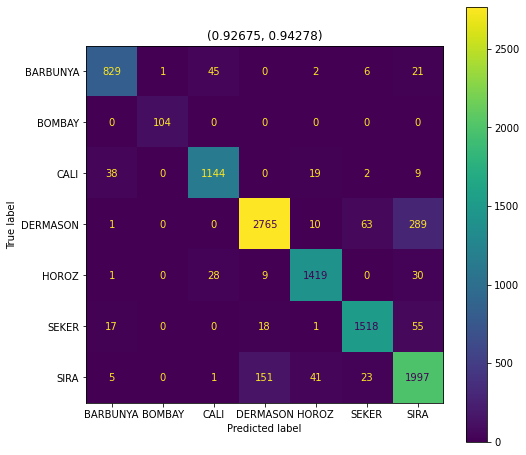

In [18]:
balanced_df = df.groupby('class', as_index=False).apply(
    lambda x: x.sample(round(df["class"].value_counts().min() * 0.8), random_state=randomness_id)
).reset_index(drop=True)

df_balanced_test = pd.merge(df, balanced_df, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge',
                                                                                                            axis=1)
print(df.shape, balanced_df.shape, df_balanced_test.shape)

# List of the pipelines for which will model be trained and evaluated.
pipelines = [
    ("SVC",
     make_pipeline(scaler, SVC(random_state=randomness_id))),
    ("Random Forest",
     make_pipeline(scaler, RandomForestClassifier(random_state=randomness_id)))
]

X = balanced_df.drop("class", axis=1).copy()
y = balanced_df["class"].copy()

print(y.value_counts())

balanced_classifier = train_evaluate_present(X, y,
                                             pipelines=pipelines,
                                             cv_split=cv_split,
                                             should_return_best=True,
                                             )[2]

X = df_balanced_test.drop("class", axis=1).copy()
y = df_balanced_test["class"].copy()

balanced_score = cross_val_score(balanced_classifier, X, y, scoring="accuracy", cv=cv_split)
_, ax = plt.subplots(figsize=(8, 8))
ax.set_title("({:0.5f}, {:0.5f})".format(balanced_score.mean(), balanced_score.max()))
ConfusionMatrixDisplay.from_estimator(balanced_classifier, X, y, ax=ax)

## Feature Selection

### Remove Correlated Features

Dropping correlated features will reduce the data frame to 10 features.
The best results were given by "SVC" classifier with:
  Mean accuracy of: 0.93042 (0.00140)
  Max accuracy of: 0.93534 (-0.00073)
---------------
Following are results for all classifiers:



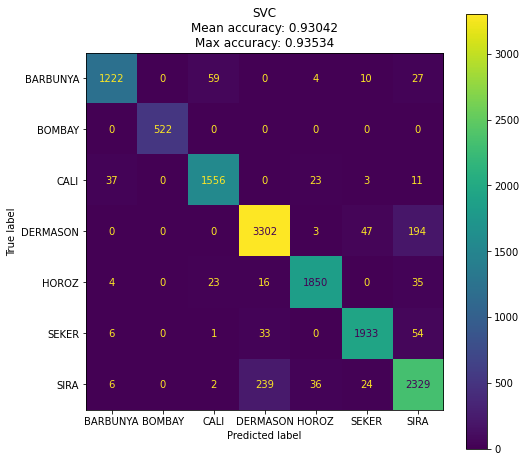

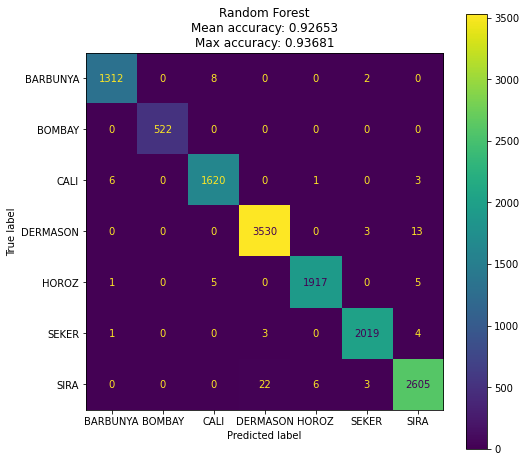

In [19]:
def trim_correlated(df_in, threshold):
    # Create correlation matrix
    corr_matrix = df_in.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    # Drop features
    return df_in.drop(to_drop, axis=1)


pipelines = [
    ("SVC",
     make_pipeline(scaler, SVC(random_state=randomness_id))),
    ("Random Forest",
     make_pipeline(scaler, RandomForestClassifier(random_state=randomness_id)))
]

df_trimmed = pd.concat([trim_correlated(df.drop("class", axis=1), 0.95), df["class"]], axis=1)
X = df_trimmed.drop("class", axis=1).copy()
y = df_trimmed["class"].copy()

print("Dropping correlated features will reduce the data frame to {} features.".format(df_trimmed.shape[1]))
train_evaluate_present(X, y,
                       pipelines=pipelines,
                       cv_split=cv_split,
                       comparison=no_optimisations_best,
                       )

### Principal Component Analysis (PCA)

The best results were given by "SVC" classifier with:
  Mean accuracy of: 0.93028 (0.00125)
  Max accuracy of: 0.93534 (-0.00073)
---------------
Following are results for all classifiers:



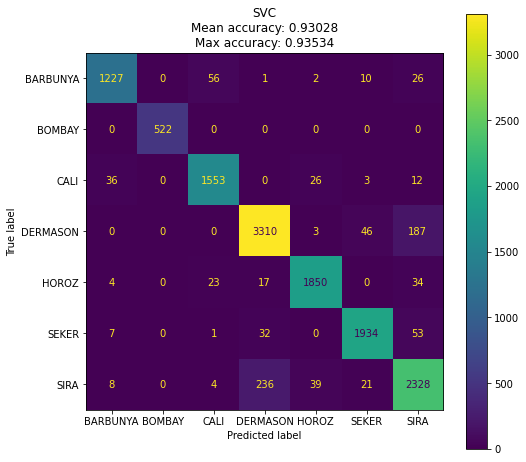

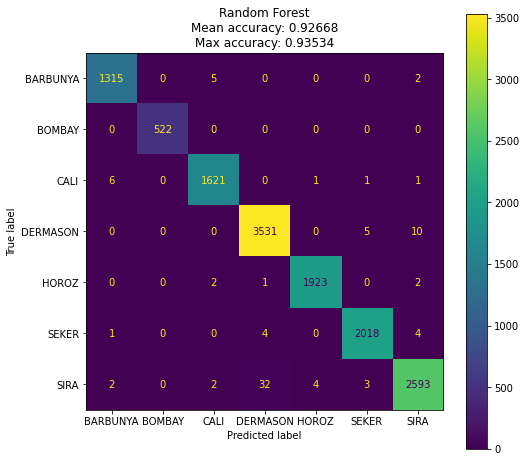

In [20]:
pca = PCA(n_components=6, whiten=True, random_state=randomness_id)
# List of the pipelines for which will model be trained and evaluated.
pipelines = [
    ("SVC",
     make_pipeline(
         scaler,
         pca,
         SVC(random_state=randomness_id))),
    ("Random Forest",
     make_pipeline(
         scaler,
         pca,
         RandomForestClassifier(random_state=randomness_id)))
]

X = df.drop("class", axis=1).copy()
y = df["class"].copy()
train_evaluate_present(X, y,
                       pipelines=pipelines,
                       cv_split=cv_split,
                       comparison=no_optimisations_best,
                       )

### Linear Discriminant Analysis (LDA)

LDA will reduce dataframe to 4 features.
The best results were given by "SVC" classifier with:
  Mean accuracy of: 0.92227 (-0.00676)
  Max accuracy of: 0.93608 (0.00000)
---------------
Following are results for all classifiers:



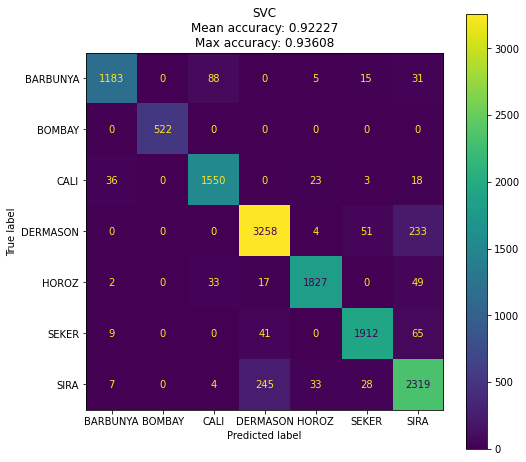

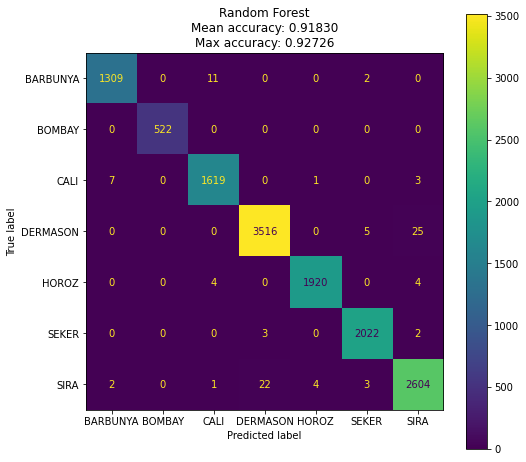

In [21]:
# Create function
def select_n_components(X, y, goal_var: float) -> int:
    lda = LinearDiscriminantAnalysis(n_components=None)
    features_lda = lda.fit(X, y)
    # Create array of explained variance ratios
    lda_var_ratios = lda.explained_variance_ratio_
    # Set initial variance explained so far
    total_variance = 0.0
    # Set initial number of features
    n_components = 0
    # For the explained variance of each feature:
    for explained_variance in lda_var_ratios:
        # Add the explained variance to the total
        total_variance += explained_variance
        # Add one to the number of components
        n_components += 1
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
    # Return the number of components
    return n_components


X = df.drop("class", axis=1).copy()
y = df["class"].copy()

n_components = select_n_components(X, y, 0.95)
print("LDA will reduce dataframe to {} features.".format(n_components))
lda = LinearDiscriminantAnalysis(n_components=n_components)

pipelines = [
    ("SVC",
     make_pipeline(scaler, lda, SVC(random_state=randomness_id))),
    ("Random Forest",
     make_pipeline(scaler, lda, RandomForestClassifier(random_state=randomness_id)))
]

train_evaluate_present(X, y,
                       pipelines=pipelines,
                       cv_split=cv_split,
                       comparison=no_optimisations_best,
                       )

#### PCA with balanced input data

The best results were given by "SVC" classifier with:
  Mean accuracy of: 0.93473 (0.00570)
  Max accuracy of: 0.94863 (0.01255)
---------------
Following are results for all classifiers:

Mean: 0.92675 (0.00000)
Max: 0.94278 (0.00000)


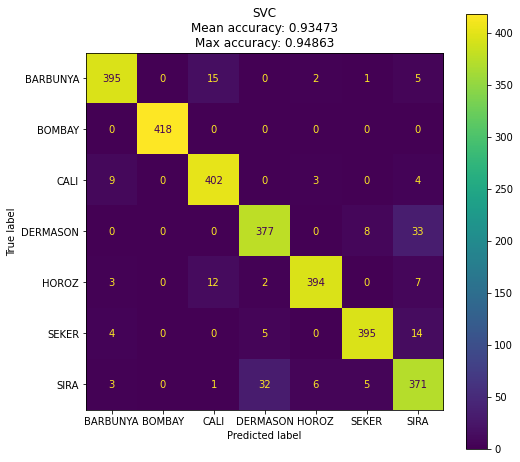

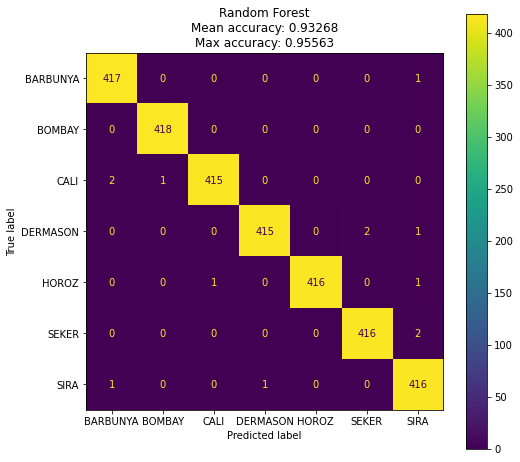

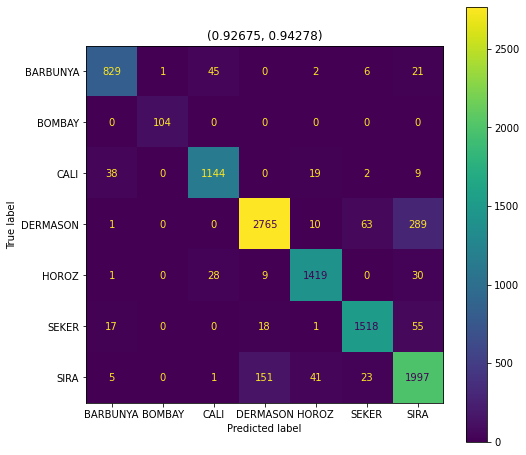

In [22]:
pca = PCA(n_components=6, whiten=True, random_state=randomness_id)

pipelines = [
    ("SVC",
     make_pipeline(scaler, pca, SVC(random_state=randomness_id))),
    ("Random Forest",
     make_pipeline(scaler, pca, RandomForestClassifier(random_state=randomness_id)))
]

X = balanced_df.drop("class", axis=1).copy()
y = balanced_df["class"].copy()

train_evaluate_present(X, y,
                       pipelines=pipelines,
                       cv_split=cv_split,
                       comparison=no_optimisations_best,
                       )

X = df_balanced_test.drop("class", axis=1).copy()
y = df_balanced_test["class"].copy()

pca_balanced_score = cross_val_score(balanced_classifier, X, y, scoring="accuracy", cv=cv_split)
_, ax = plt.subplots(figsize=(8, 8))
ax.set_title("({:0.5f}, {:0.5f})".format(pca_balanced_score.mean(), pca_balanced_score.max()))
ConfusionMatrixDisplay.from_estimator(balanced_classifier, X, y, ax=ax)
print("Mean: {:0.5f} ({:0.5f})".format(pca_balanced_score.mean(), pca_balanced_score.mean() - balanced_score.mean()))
print("Max: {:0.5f} ({:0.5f})".format(pca_balanced_score.max(), pca_balanced_score.max() - balanced_score.max()))

## Model selection

### Hyperparameter tuning

In [23]:
X = df.drop("class", axis=1).copy()
y = df["class"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomness_id)

# Create a pipeline
pipe = Pipeline([("scaler", RobustScaler()), ("pca", PCA()), ("classifier", SVC())])

# Create space of candidate values
search_space = [{
    "pca__n_components": [None, 6, 7],
    "pca__random_state": [randomness_id],
    "classifier__kernel": ['rbf', 'linear'],
    "classifier__C": [0.1, 1, 10, 100],
    "classifier__gamma": ["scale", "auto", 1, 0.1, 0.01],
    "classifier__random_state": [randomness_id],
}]

# Create grid search
grid = GridSearchCV(pipe, search_space, cv=5, verbose=1, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

results = cross_validate(grid.best_estimator_, X_test, y_test, cv=5)

test_scores = results["test_score"]
mean_score = test_scores.mean()
max_score = test_scores.max()
print("Mean: {:0.5f} ({:0.5f})".format(mean_score, mean_score - no_optimisations_best[1][0]))
print("Max: {:0.5f} ({:0.5f})".format(max_score, max_score - no_optimisations_best[1][1]))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best params: {'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'classifier__random_state': 5100, 'pca__n_components': None, 'pca__random_state': 5100}
Mean: 0.92949 (0.00046)
Max: 0.93761 (0.00154)


In [24]:
X = balanced_df.drop("class", axis=1).copy()
y = balanced_df["class"].copy()

# Create a pipeline
pipe = Pipeline([("scaler", RobustScaler()), ("pca", PCA()), ("classifier", SVC())])

# Create space of candidate values
search_space = [{
    "pca__n_components": [None, 6, 7],
    "pca__random_state": [randomness_id],
    "classifier__kernel": ['rbf', 'linear'],
    "classifier__C": [0.1, 1, 10, 100],
    "classifier__gamma": ["scale", "auto", 1, 0.1, 0.01],
    "classifier__random_state": [randomness_id],
}]

# Create grid search
grid = GridSearchCV(pipe, search_space, cv=5, verbose=1, n_jobs=-1)

grid.fit(X, y)

print("Best params:", grid.best_params_)

X = df_balanced_test.drop("class", axis=1).copy()
y = df_balanced_test["class"].copy()

results = cross_validate(grid.best_estimator_, X, y, cv=5)

test_scores = results["test_score"]
mean_score = test_scores.mean()
max_score = test_scores.max()
print("Mean: {:0.5f} ({:0.5f})".format(mean_score, mean_score - balanced_score.mean()))
print("Max: {:0.5f} ({:0.5f})".format(max_score, max_score - balanced_score.max()))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best params: {'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'classifier__random_state': 5100, 'pca__n_components': None, 'pca__random_state': 5100}
Mean: 0.92844 (0.00169)
Max: 0.93155 (-0.01122)
